In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [33]:
data  = pd.read_csv("C:\\Users\\HAI\\Downloads\\fake_or_real_news.csv")
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [34]:
data.shape

(6335, 4)

In [35]:
list(data.columns)

['Unnamed: 0', 'title', 'text', 'label']

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [37]:
data.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [38]:
data.duplicated().sum()

0

C:\Users\HAI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

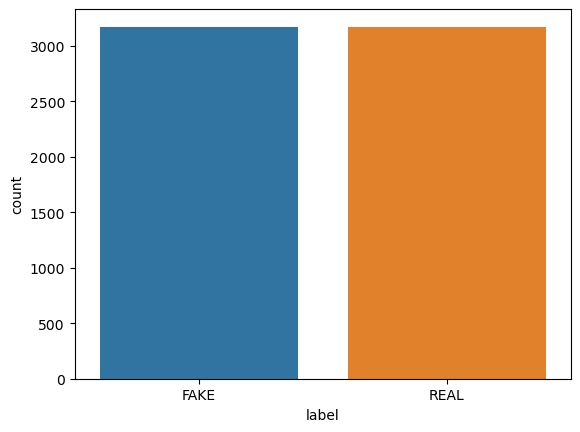

In [39]:
sns.countplot(data['label'])

In [40]:
data_text_process = data['text'].map(lambda x: re.sub('(Reuters)',"",x))
data_text_process = data_text_process.map(lambda x: re.sub('[^A-Za-z0-9]+',"",x))
data_text_process = data_text_process.map(lambda x: x.lower())                                                                    

In [41]:
data_text_process

0       danielgreenfieldashillmanjournalismfellowatthe...
1       googlepinterestdigglinkedinredditstumbleuponpr...
2       ussecretaryofstatejohnfkerrysaidmondaythathewi...
3       kaydeekingkaydeekingnovember92016thelessonfrom...
4       itsprimarydayinnewyorkandfrontrunnershillarycl...
                              ...                        
6330    thestatedepartmenttoldtherepublicannationalcom...
6331    thepinpbsshouldstandforplutocraticorpentagonpo...
6332    antitrumpprotestersaretoolsoftheoligarchyrefor...
6333    addisababaethiopiapresidentobamaconvenedameeti...
6334    jebbushissuddenlyattackingtrumphereswhythatmat...
Name: text, Length: 6335, dtype: object

In [42]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatize(text):
    lm = WordNetLemmatizer()
    tokens = [lm.lemmatize(word) for word in text.split()]
    return " ".join(tokens)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HAI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
lemmatize(data_text_process [0])

'danielgreenfieldashillmanjournalismfellowatthefreedomcenterisanewyorkwriterfocusingonradicalislaminthefinalstretchoftheelectionhillaryrodhamclintonhasgonetowarwiththefbithewordunprecedentedhasbeenthrownaroundsooftenthiselectionthatitoughttoberetiredbutitsstillunprecedentedforthenomineeofamajorpoliticalpartytogowarwiththefbibutthatsexactlywhathillaryandherpeoplehavedonecomapatientsjustwakingupnowandwatchinganhourofcnnfromtheirhospitalbedswouldassumethatfbidirectorjamescomeyishillarysopponentinthiselectionthefbiisunderattackbyeveryonefromobamatocnnhillaryspeoplehavecirculatedaletterattackingcomeytherearecurrentlymoremediahitpieceslambastinghimthantargetingtrumpitwouldntbetoosurprisingiftheclintonsortheiralliesweretostartrunningattackadsagainstthefbithefbisleadershipisbeingwarnedthattheentireleftwingestablishmentwillformalynchmobiftheycontinuegoingafterhillaryandthefbiscredibilityisbeingattackedbythemediaandthedemocratstopreemptivelyheadofftheresultsoftheinvestigationoftheclintonfoundati

In [44]:
data_text_process = data_text_process.apply(lemmatize)

In [45]:
x = data['text']
y = data.label
x.head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 53)
print(x_train.shape)

(4244,)


In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfid = TfidfVectorizer(stop_words = 'english',max_df = 0.7)
x_train = Tfid.fit_transform(x_train)
x_test = Tfid.transform(x_test)

In [22]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

accuracy_score:91.391679
val_score:0.906684
              precision    recall  f1-score   support

        FAKE       0.88      0.95      0.91      1008
        REAL       0.95      0.88      0.91      1083

    accuracy                           0.91      2091
   macro avg       0.92      0.92      0.91      2091
weighted avg       0.92      0.91      0.91      2091

[[962  46]
 [134 949]]


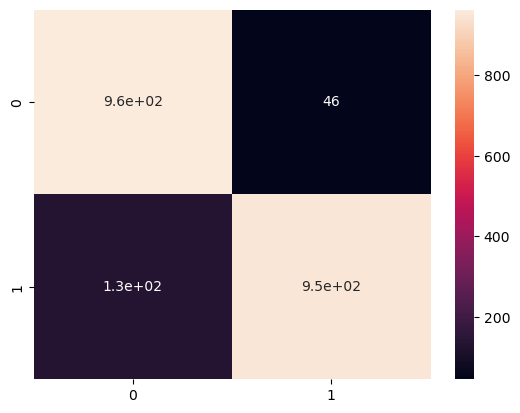

In [26]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
pred = LR.predict(x_test)

print('accuracy_score:%2f'% (accuracy_score(y_test,pred)*100))
cv_results = cross_val_score(LR,x_train,y_train,cv = 10,scoring = 'accuracy')
print('val_score:%2f'% (cv_results.mean()))


print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True)

print(cm)




accuracy_score:80.918221
val_score:0.799483
              precision    recall  f1-score   support

        FAKE       0.80      0.80      0.80      1008
        REAL       0.82      0.82      0.82      1083

    accuracy                           0.81      2091
   macro avg       0.81      0.81      0.81      2091
weighted avg       0.81      0.81      0.81      2091

[[808 200]
 [199 884]]


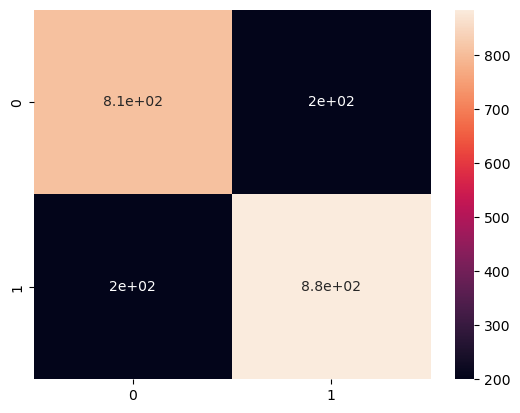

In [29]:
from sklearn.tree import DecisionTreeClassifier

DC = DecisionTreeClassifier()
DC.fit(x_train,y_train)
pred = DC.predict(x_test)
print('accuracy_score:%2f'% (accuracy_score(y_test,pred)*100))
cv_results = cross_val_score(DC,x_train,y_train,cv = 10,scoring = 'accuracy')
print('val_score:%2f'% (cv_results.mean()))


print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True)

print(cm)



accuracy_score:90.100430
val_score:0.903391
              precision    recall  f1-score   support

        FAKE       0.88      0.91      0.90      1008
        REAL       0.92      0.89      0.90      1083

    accuracy                           0.90      2091
   macro avg       0.90      0.90      0.90      2091
weighted avg       0.90      0.90      0.90      2091

[[922  86]
 [121 962]]


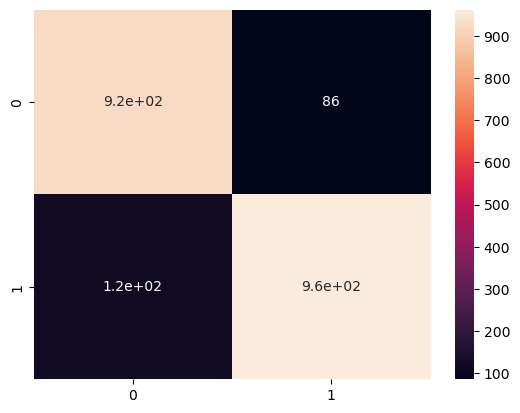

In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
pred = RF.predict(x_test)

print('accuracy_score:%2f'% (accuracy_score(y_test,pred)*100))
cv_results = cross_val_score(RF,x_train,y_train,cv = 10,scoring = 'accuracy')
print('val_score:%2f'% (cv_results.mean()))


print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True)

print(cm)



accuracy_score:85.652798
val_score:0.852501
              precision    recall  f1-score   support

        FAKE       0.96      0.73      0.83      1008
        REAL       0.80      0.97      0.88      1083

    accuracy                           0.86      2091
   macro avg       0.88      0.85      0.85      2091
weighted avg       0.88      0.86      0.85      2091

[[ 739  269]
 [  31 1052]]


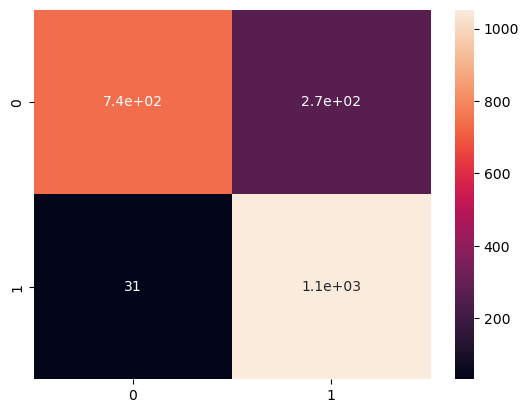

In [30]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train,y_train)
pred = NB.predict(x_test)

print('accuracy_score:%2f'% (accuracy_score(y_test,pred)*100))
cv_results = cross_val_score(NB,x_train,y_train,cv = 10,scoring = 'accuracy')
print('val_score:%2f'% (cv_results.mean()))


print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True)

print(cm)



accuracy_score:93.495935
val_score:0.939911
              precision    recall  f1-score   support

        FAKE       0.92      0.95      0.93      1008
        REAL       0.95      0.93      0.94      1083

    accuracy                           0.93      2091
   macro avg       0.93      0.94      0.93      2091
weighted avg       0.94      0.93      0.93      2091

[[ 953   55]
 [  81 1002]]


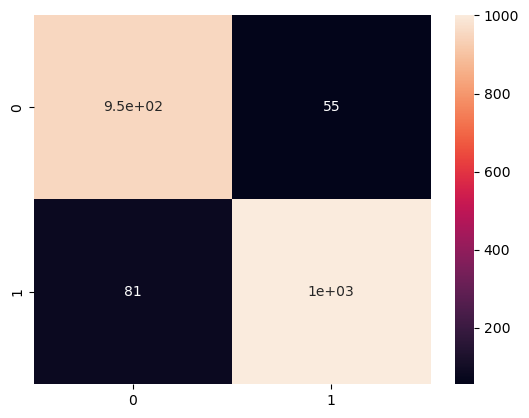

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

PC = PassiveAggressiveClassifier()
PC.fit(x_train,y_train)
pred =  PC.predict(x_test)

print('accuracy_score:%2f'% (accuracy_score(y_test,pred)*100))
cv_results = cross_val_score(PC,x_train,y_train,cv = 10,scoring = 'accuracy')
print('val_score:%2f'% (cv_results.mean()))


print(classification_report(y_test,pred))

cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot = True)

print(cm)

